In [1]:
# Load Packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [78]:
# the main function
def f(x):
    x0 = x[0]
    x1 = x[1]
    return np.array(x0**4+x1**4-2*x0**3-x1-5*x0**2)
# gradient of the function
def df(x):
    x0 = x[0]
    x1 = x[1]
    return np.array([4*x0**3-6*x0**2-10*x0, 4*x1**3-1])

In [216]:
# using Amijo_Goldstein condition for choosing right step size
def Amijo_Goldstein(f, df, x, s = 0.001):
    d = df(x)
    alpha = 1
    eta = 0.9
    # Perform Amijo_Goldstein line search until the Amijo_Goldstein condition is satisfied
    while f(x - alpha*df(x)) > f(x) - alpha*s*(np.matmul(df(x).T, d)) \
        or f(x - alpha*df(x)) < f(x) - alpha*eta*(np.matmul(df(x).T, d)):
        alpha = alpha/2 # Reduce the step size by a halving
        if alpha == 0 : break
    return alpha


**Gradient Descent with Momentum**

In [232]:
# initial guess
x = np.array([-1.2,0.1])
# momentum is zero in the begining
change = np.array([0,0])
momentum_const = 0.66
iterations = 50
a = [x]
for _ in range(iterations):
    alpha = Amijo_Goldstein(f, df, x)
    new_change = alpha*df(x)  + momentum_const*change
    x = x - new_change
    a.append(x)
    change = new_change
print(f"minimum point: {x}")
print(f"minimum value: {f(x)}")

minimum point: [2.49997023 0.62997289]
minimum value: -23.909970377840196


**Gradient Descent**

In [233]:
# initial guess
x = np.array([-1.2,0.1])
change = np.array([0,0])
b = [x]
iterations = 50
for _ in range(iterations):
    alpha = Amijo_Goldstein(f, df, x)
    new_change = alpha*df(x)
    x = x - new_change
    b.append(x)
print(f"minimum point: {x}")
print(f"minimum value: {f(x)}")

minimum point: [0.576 0.598]
minimum value: -2.401130017008003


Adadelta

In [234]:
x = np.array([-1.2,0.1]) #The vector of initial parameters
rho = 0.9 #The decay rate
epsilon = 1e-3 #A small value to prevent division by zero
iterations = 50 #The number of iterations for the algorithm

#Initialize accumulators for squared gradients and updates
Eg2 = np.zeros(2)
Edelta2 = np.zeros(2)
c = [x]
#Run the Adadelta optimization algorithm for a specified number of iterations
for it in range(iterations):
    #Compute the gradient at the current parameter value
    #Update the accumulated squared gradients
    g = df(x)
    for i in range(2):
        Eg2[i] = rho * Eg2[i] + (1-rho) * g[i]**2
    #Compute the parameter update using Adadelta formula
    new_x = []
    for i in range(2):
        alpha = (np.sqrt(Edelta2[i]) + epsilon) / (np.sqrt(Eg2[i]) + epsilon)
        change = alpha*g[i]
        #Update the accumulated squared updates
        Edelta2[i] = rho * Edelta2[i] + (1-rho) * change**2
        #Apply the update to the parameters
        val = x[i] - change
        new_x.append(val)
    x = np.array(new_x)
    c.append(x)
    f_x = f(x)

print(f"minimum point: {x}")
print(f"minimum value: {f(x)}")

minimum point: [-1.01976159  0.48102491]
minimum value: -2.4247058125786274


Adam

In [235]:
x = np.array([-1.2,0.1]) #The vector of initial parameters
alpha = 0.99
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m = np.zeros(2)
v = np.zeros(2)
bias_corrected_m = np.zeros(2)
bias_corrected_v = np.zeros(2)
iterations = 50 #The number of iterations for the algorithm
d = [x] #The list of all the points the algorithm went through
for it in range(iterations):
    #Compute the gradient at the current parameter value
    #Update the accumulated squared gradients
    g = df(x)
    for i in range(2):
        m[i] = beta1 * m[i] + (1-beta1) * g[i]
        bias_corrected_m[i] = m[i] / (1-beta1**(it+1))
        v[i] = beta2 * v[i] + (1-beta2) * g[i]**2
        bias_corrected_v[i] = v[i] / (1-beta2**(it+1))
        
    new_x = []
    for i in range(2):
        val = x[i] - alpha * bias_corrected_m[i] / (np.sqrt(bias_corrected_v[i]) + epsilon)
        new_x.append(val)
    x = np.array(new_x)
    d.append(x)
    f_x = f(x)

print(f"minimum point: {x}")
print(f"minimum value: {f(x)}")

minimum point: [2.57704492 0.60938342]
minimum value: -23.801411473462437


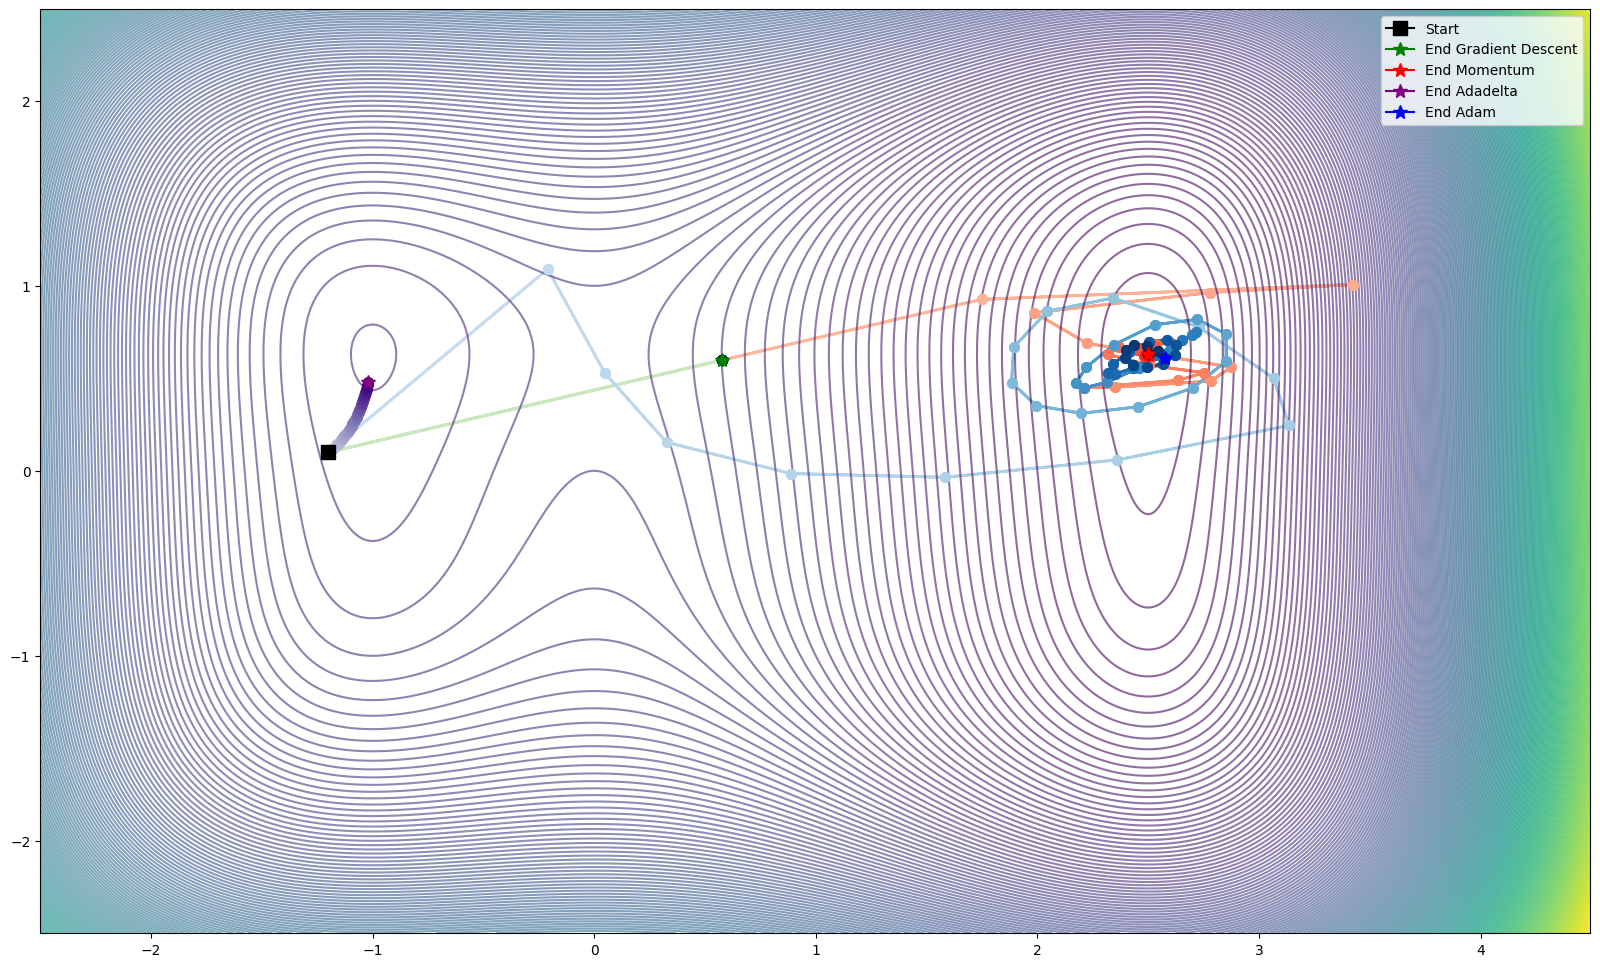

In [236]:
# Normalize the step indices for color mapping
cmap_a = plt.cm.Reds
cmap_b = plt.cm.Greens
cmap_c = plt.cm.Purples
cmap_d = plt.cm.Blues
# Plot contour
X = np.arange(-2.5, 4.5, 0.005)
Y = np.arange(-2.5, 2.5, 0.005)
X, Y = np.meshgrid(X, Y)
Z = f([X,Y])
plt.figure(figsize=(20, 12))
cmap = plt.cm.get_cmap('viridis')
plt.contour(X,Y,Z,250, cmap=cmap, alpha = 0.6)
def create_custom_colormap(base_cmap, start=0.2, stop=1.0):
    base = plt.cm.get_cmap(base_cmap)
    colors = base(np.linspace(start, stop, base.N))
    return mcolors.LinearSegmentedColormap.from_list(f'{base_cmap}_custom', colors)

cmap_a = create_custom_colormap('Reds', start=0.25)
cmap_b = create_custom_colormap('Greens', start=0.25)
cmap_c = create_custom_colormap('Purples', start=0.25)
cmap_d = create_custom_colormap('Blues', start=0.25)

n = iterations
# Normalize the step indices for color mapping
norm = mcolors.Normalize(vmin=0, vmax=n-1)
# Plot steps for type 1 gradient descent
for i in range(n):
    plt.plot([a[i][0]], [a[i][1]], marker='o', markersize=7, color=cmap_a(norm(i)))
    plt.plot([a[i + 1][0]], [a[i + 1][1]], marker='o', markersize=7, color=cmap_a(norm(i + 1)))
    plt.arrow(a[i][0], a[i][1], a[i + 1][0] - a[i][0], a[i + 1][1] - a[i][1],
              head_width=0, head_length=0, fc=cmap_a(norm(i)), ec=cmap_a(norm(i)), linewidth=2.0)
    plt.plot([b[i][0]], [b[i][1]], marker='o', markersize=7, color=cmap_b(norm(i)))
    plt.plot([b[i + 1][0]], [b[i + 1][1]], marker='o', markersize=7, color=cmap_b(norm(i + 1)))
    plt.arrow(b[i][0], b[i][1], b[i + 1][0] - b[i][0], b[i + 1][1] - b[i][1],
              head_width=0, head_length=0, fc=cmap_b(norm(i)), ec=cmap_b(norm(i)), linewidth=2.0)
    plt.plot([c[i][0]], [c[i][1]], marker='o', markersize=7, color=cmap_c(norm(i)))
    plt.plot([c[i + 1][0]], [c[i + 1][1]], marker='o', markersize=7, color=cmap_c(norm(i + 1)))
    plt.arrow(c[i][0], c[i][1], c[i + 1][0] - c[i][0], c[i + 1][1] - c[i][1],
              head_width=0, head_length=0, fc=cmap_c(norm(i)), ec=cmap_c(norm(i)), linewidth=2.0)
    plt.plot([d[i][0]], [d[i][1]], marker='o', markersize=7, color=cmap_d(norm(i)))
    plt.plot([d[i + 1][0]], [d[i + 1][1]], marker='o', markersize=7, color=cmap_d(norm(i + 1)))
    plt.arrow(d[i][0], d[i][1], d[i + 1][0] - d[i][0], d[i + 1][1] - d[i][1],
              head_width=0, head_length=0, fc=cmap_d(norm(i)), ec=cmap_d(norm(i)), linewidth=2.0)

# Mark the start and end points explicitly
plt.plot(a[0][0], a[0][1], marker='s', markersize=10, color='black', label='Start')
plt.plot(b[-1][0], b[-1][1], marker='*', markersize=10, color='green', label='End Gradient Descent')
plt.plot(a[-1][0], a[-1][1], marker='*', markersize=10, color='red', label='End Momentum')
plt.plot(c[-1][0], c[-1][1], marker='*', markersize=10, color='purple', label='End Adadelta')
plt.plot(d[-1][0], d[-1][1], marker='*', markersize=10, color='blue', label='End Adam')


plt.legend()
plt.show()